In [1]:
#important library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# Load dataset

In [2]:
# loading Dataset
df=pd.read_csv("../input/energy-efficiency-data-set/energy_efficiency_data.csv")
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [3]:
# data describtion
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


**Observations**
1.   for better visualisation need to change some column values e.g.['Surface_Area','Wall_Area','roof_area'] 


In [4]:
# data information regarding column containts or any  Nullvalues

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


Observations

1.   No null or missing **value** 







# Data Visualization


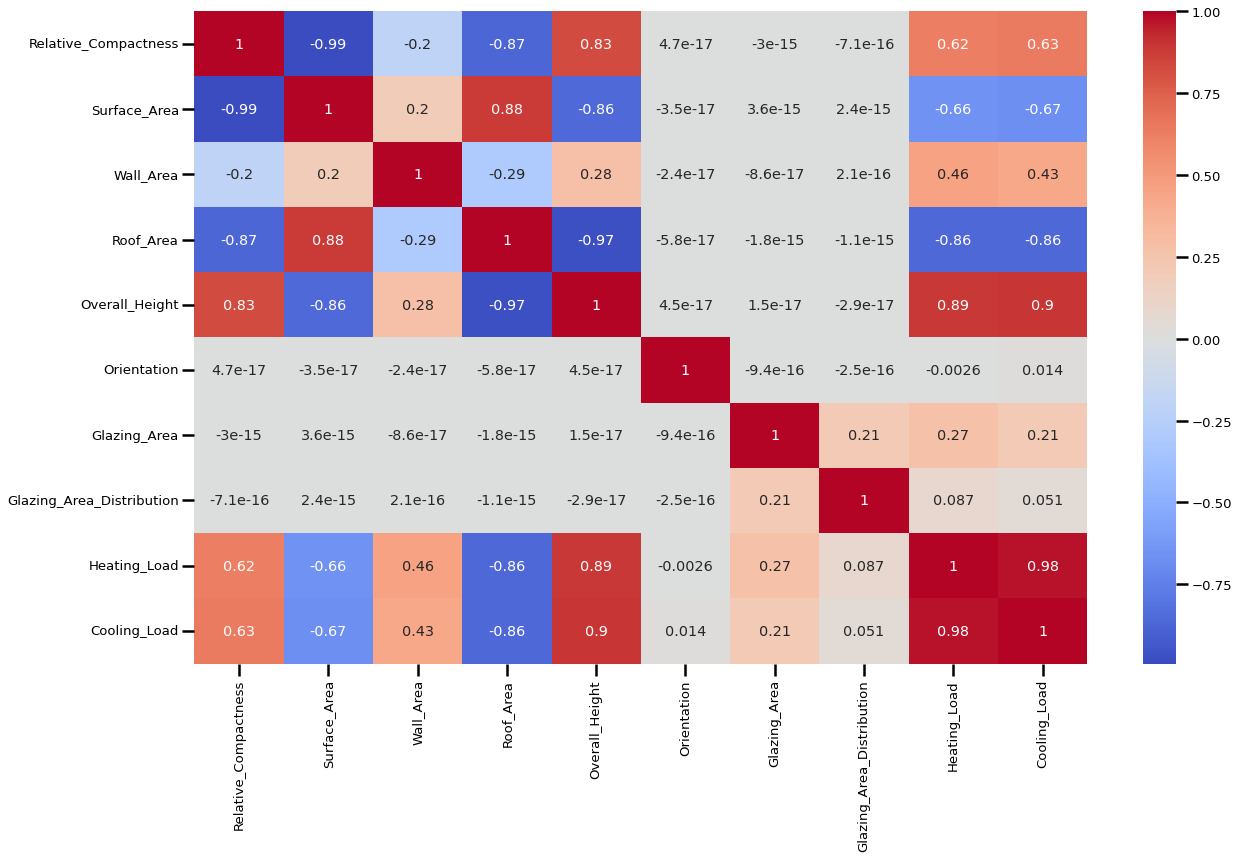

In [5]:
# plotting heat map to find out corelation with heating and coling parameter
df.corr()
plt.figure(figsize=(20,12))
sns.set_context('poster', font_scale=0.6)
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
#plt.title('R')
plt.show()


**Observations**
1.   Cooling and heating load is related with , [ overall_height >>> relative_compctness> wall_area ]


In [6]:
# origenal dataset save in new dataframe for visualization
df1=df
df1

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [7]:
# converting higher value to its +-10% for better visualisation

df1['Relative_Compactness']= (df1['Relative_Compactness']*10)
df1['Glazing_Area']= (df1['Glazing_Area']*10)

df1['Surface_Area']= (df1['Surface_Area']*0.06)
df1['Wall_Area']= (df1['Wall_Area']*0.1)
df1['Roof_Area']= (df1['Roof_Area']*0.1)
df1.head(10)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,9.8,30.87,29.40,11.025,7.0,2,0.0,0,15.55,21.33
1,9.8,30.87,29.40,11.025,7.0,3,0.0,0,15.55,21.33
2,9.8,30.87,29.40,11.025,7.0,4,0.0,0,15.55,21.33
3,9.8,30.87,29.40,11.025,7.0,5,0.0,0,15.55,21.33
4,9.0,33.81,31.85,12.250,7.0,2,0.0,0,20.84,28.28
5,9.0,33.81,31.85,12.250,7.0,3,0.0,0,21.46,25.38
6,9.0,33.81,31.85,12.250,7.0,4,0.0,0,20.71,25.16
7,9.0,33.81,31.85,12.250,7.0,5,0.0,0,19.68,29.60
8,8.6,35.28,29.40,14.700,7.0,2,0.0,0,19.50,27.30
9,8.6,35.28,29.40,14.700,7.0,3,0.0,0,19.95,21.97


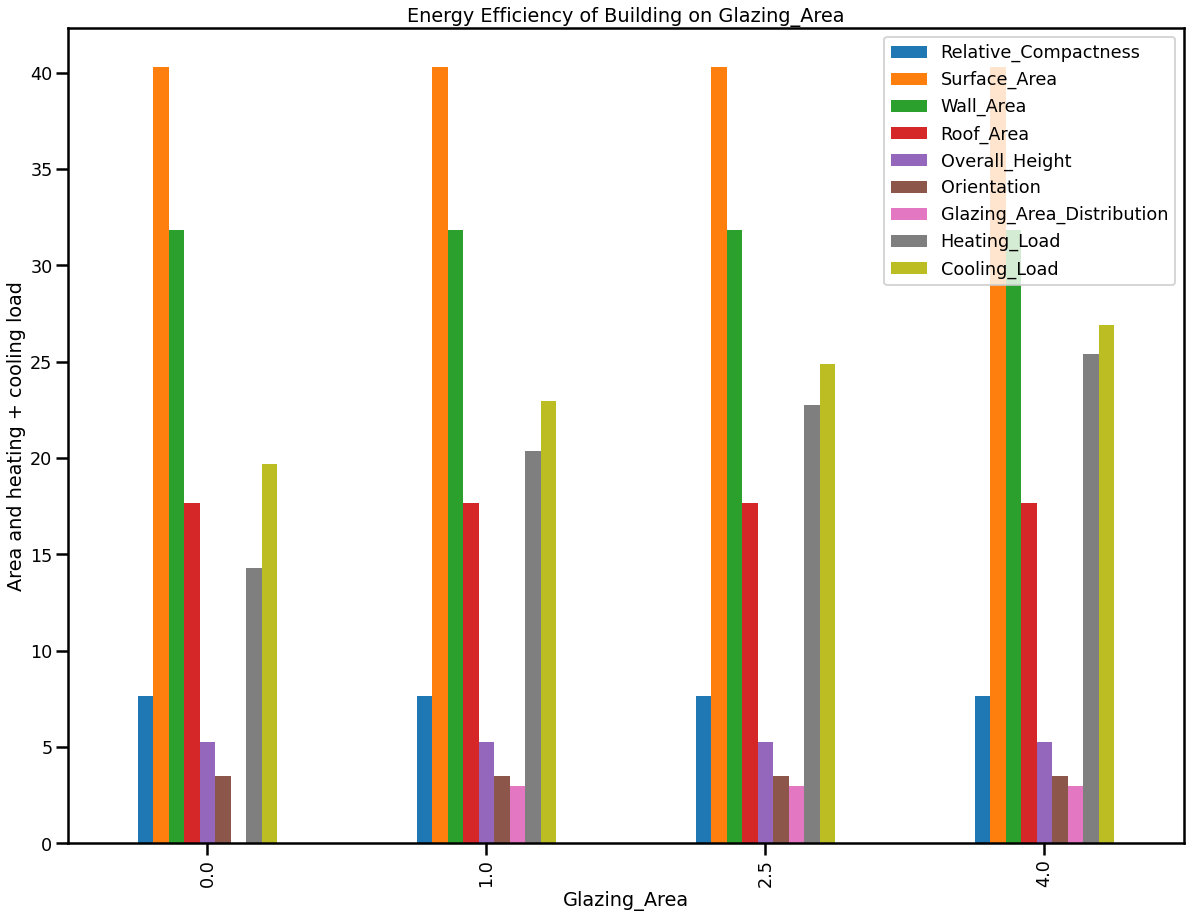

In [8]:
# data visualisation on drug column
sns.set_context('poster', font_scale=0.8)
df1.groupby('Glazing_Area').mean().plot(kind='bar', figsize=(20,15)) 
plt.xlabel('Glazing_Area')
plt.ylabel('Area and heating + cooling load')
plt.title('Energy Efficiency of Building on Glazing_Area')
plt.show()


Observations
1.   Cooling and heating load increses with incresing 


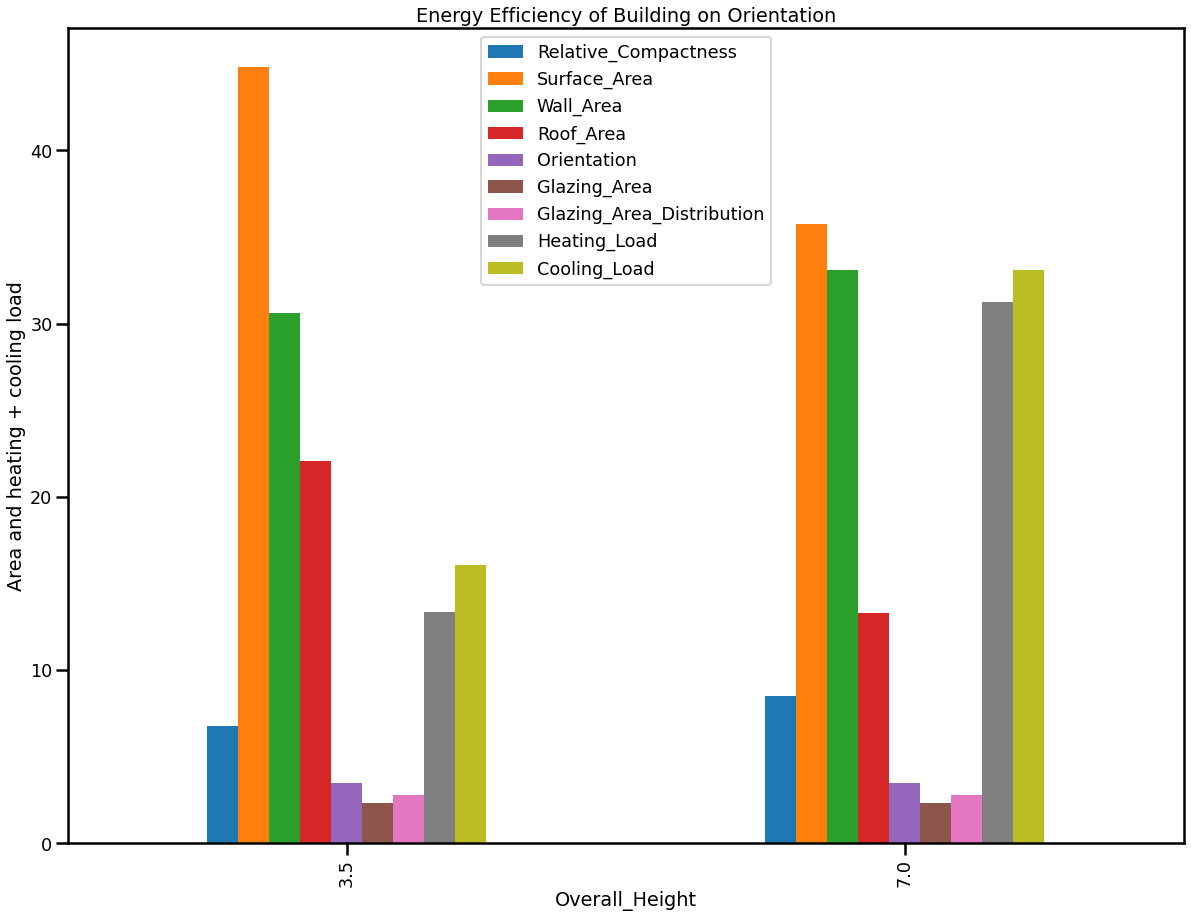

In [9]:
sns.set_context('poster', font_scale=0.8)
df1.groupby('Overall_Height').mean().plot(kind='bar', figsize=(20,15)) 
plt.xlabel('Overall_Height')
plt.ylabel('Area and heating + cooling load')
plt.title('Energy Efficiency of Building on Orientation')
plt.show()


Observations
1.   Cooling and heating load increses with incresing **OverallHeight**
2.   Cooling and heating load increses with Decrising **RoofArea**


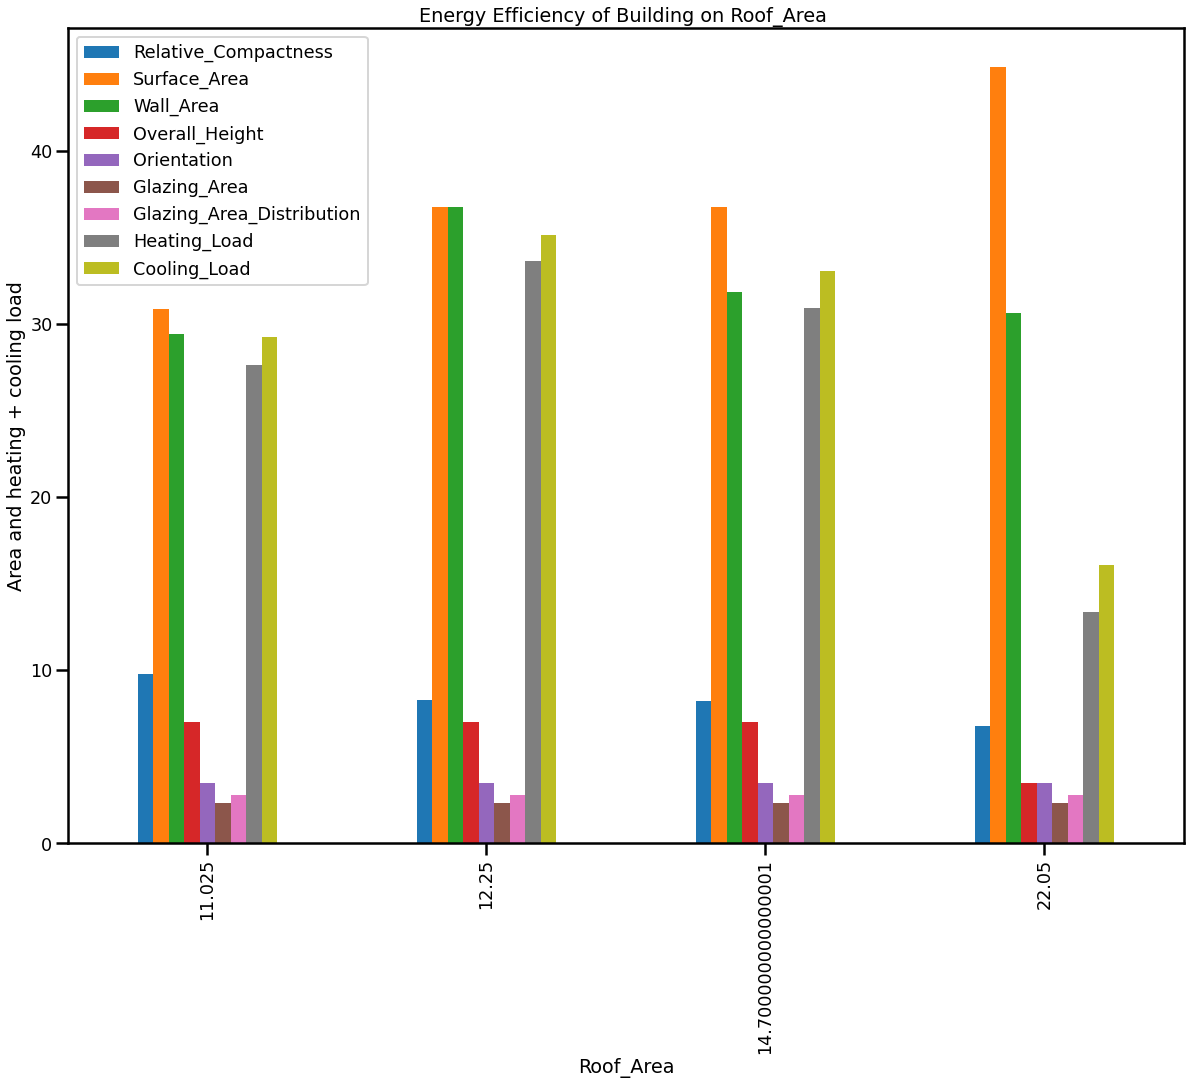

In [10]:
sns.set_context('poster', font_scale=0.8)
df1.groupby('Roof_Area').mean().plot(kind='bar', figsize=(20,15)) 
plt.xlabel('Roof_Area')
plt.ylabel('Area and heating + cooling load')
plt.title('Energy Efficiency of Building on Roof_Area ')
plt.show()


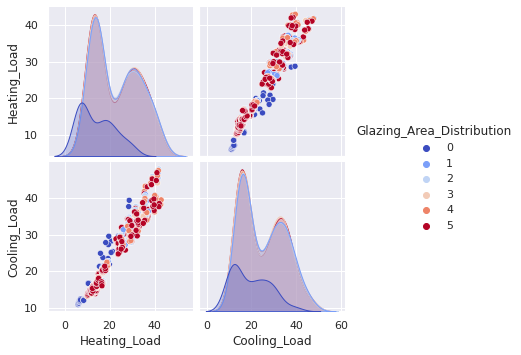

In [11]:
X = df.drop(['Relative_Compactness','Surface_Area','Wall_Area','Roof_Area','Overall_Height','Orientation','Glazing_Area'], axis=1) # features
sns.set_context('poster', font_scale=0.8 )
sns.set(rc={'figure.figsize':(10,8)})
sns.pairplot(X,hue='Glazing_Area_Distribution', palette='coolwarm')


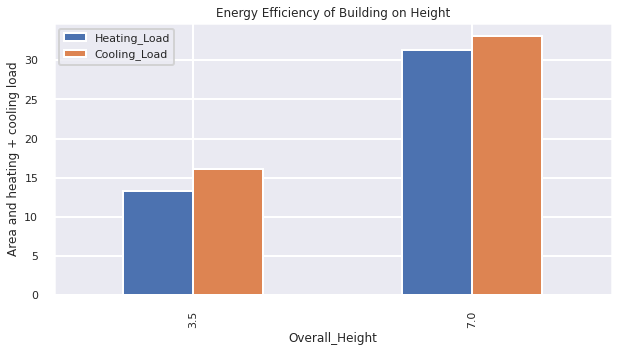

In [12]:
X1= df.drop(['Relative_Compactness','Surface_Area','Wall_Area','Roof_Area','Orientation','Glazing_Area','Glazing_Area_Distribution'], axis=1) # features

sns.set_context('poster', font_scale=0.5)
X1.groupby('Overall_Height').mean().plot(kind='bar', figsize=(10,5)) 
plt.xlabel('Overall_Height')
plt.ylabel('Area and heating + cooling load')
plt.title('Energy Efficiency of Building on Height')
plt.show()


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


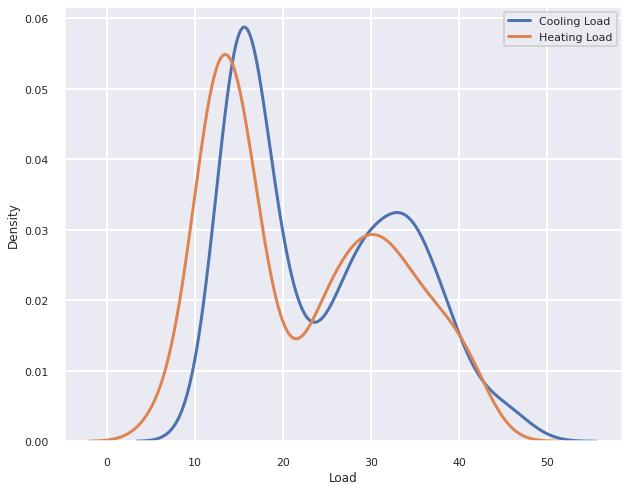

In [13]:
sns.distplot(df['Cooling_Load'],hist=False)
sns.distplot(df['Heating_Load'],hist=False)
plt.legend(['Cooling Load','Heating Load'])
plt.xlabel('Load')
plt.show()


In [14]:
X = df.drop(['Heating_Load','Cooling_Load'], axis=1) # features

y = df['Heating_Load'] # labels


# Baseline Models


In [15]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5, metric='euclidean')

# training a knn model
model.fit(X,y)


KNeighborsRegressor(metric='euclidean')

In [16]:
X_ohe = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y)


In [17]:
model.score(X, y)

0.9935764842987617

In [18]:
scores = []
for k in range(1,40):
    knn = KNeighborsRegressor(k).fit(X, y)
    scores.append(knn.score(X, y))

print(scores, end = " ")


[1.0, 0.9991824167121486, 0.9975535146444809, 0.9943164559783302, 0.9935764842987617, 0.9914161060463293, 0.9896515550933873, 0.9880743527345085, 0.9847558823315455, 0.981052130792205, 0.9821728366069126, 0.9818118328316953, 0.980139537775749, 0.9779154849129852, 0.9779329827073215, 0.9783295667075782, 0.978193808304644, 0.9771798850357531, 0.9759571566682336, 0.9745525488693367, 0.9733304694689677, 0.9726503548522415, 0.9726077223477109, 0.9719027282105304, 0.9712655612841146, 0.9697469486558388, 0.9691258252959865, 0.9689221254578545, 0.9680556604182342, 0.9671168896051762, 0.9662721871458935, 0.9651725188536695, 0.9643828323837536, 0.9628299785453971, 0.9615578763390786, 0.9605000401786252, 0.9593654242201884, 0.958185428787297, 0.9570582037068154] 

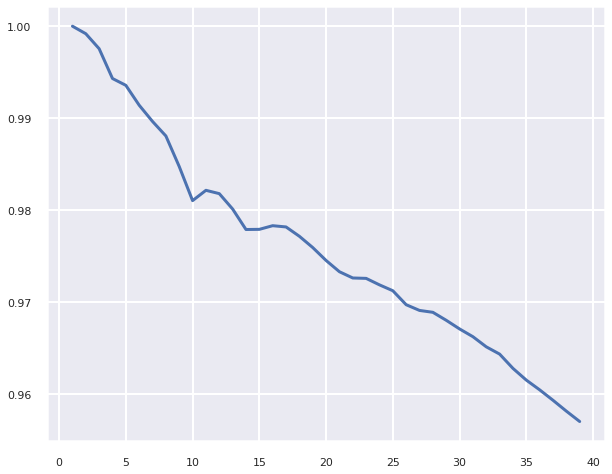

In [19]:
plt.plot(np.arange(1,40), scores);


In [20]:
model = KNeighborsRegressor(n_neighbors=11, metric='euclidean')

# training a knn model
model.fit(X,y)


KNeighborsRegressor(metric='euclidean', n_neighbors=11)

In [21]:
model.score(X, y)

0.9821728366069126

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import metrics

In [23]:
X = df.drop(['Heating_Load','Cooling_Load'], axis=1) # features

y = df['Heating_Load'] # labels


In [24]:
# dividing our data
X_train, X_test, y_train, y_test = train_test_split(X,y) 

In [25]:
model = SVR(C=1.0, kernel='rbf')

model.fit(X,y)
#SVC(C=1.0, kernel='rbf', degree=3, gamma=0.0, coef0=0.0, shrinking=True, probability=False,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=None)


SVR()

In [26]:
model.score(X_test, y_test) # validation dataset

0.8219277545266948

In [27]:
model.score(X_train,y_train) # training dataset

0.8347967775491963

In [28]:
X_ohe = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y)

In [29]:

svc = SVR()
svc.fit(X_train, y_train)

SVR()

In [30]:
svc.score(X_test, y_test), svc.score(X_train, y_train)

(0.8203463742591894, 0.8066827608383742)

In [31]:
from sklearn.tree import DecisionTreeRegressor
X = df.drop(['Overall_Height','Cooling_Load'], axis=1) # features
y = df['Heating_Load'] # labels

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
dt = DecisionTreeRegressor()


In [33]:
dt.fit(X_train,y_train)


DecisionTreeRegressor()

In [34]:
dt.score(X_test, y_test)


0.9999217846308432

In [35]:
y_pred = dt.predict(X_test) # making prediction 


In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [37]:
#4. Data Preprocessing¶

X = df[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area','Glazing_Area_Distribution']]
y_h = df[['Heating_Load']]
y_c = df[['Cooling_Load']]

In [38]:
#4.1 Normalizing¶
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")


# Data Normalization

In [39]:
# define standard scaler
mmx_scaler = MinMaxScaler()
stand_scalar = StandardScaler()
# transform data
X_normalized = mmx_scaler.fit_transform(X)
X_standarized = stand_scalar.fit_transform(X)


In [40]:
# Model Fitting
# Train Test Split
X_train, X_test, yh_train, yh_test, yc_train, yc_test = train_test_split(X_normalized,y_h,y_c,test_size=0.33, random_state = 42)
                                                                        

# Hyperparameter Tuning


In [41]:
pip install catboost 


Note: you may need to restart the kernel to use updated packages.


In [42]:
from scipy.stats import randint as sp_randint
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense
from keras.models import Sequential
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_auc_score


In [43]:
Acc = pd.DataFrame(index=None,columns=['model','train_Heating','test_Heating','train_Cooling','test_Cooling'])

In [44]:
regressors = [['SVR',SVR()],
              ['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['KNeighborsRegressor', KNeighborsRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['MLPRegressor',MLPRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['GradientBoostingRegressor',GradientBoostingRegressor()],
              ['LinearRegression',LinearRegression()]]


In [45]:
for mod in regressors:
    name = mod[0]
    model = mod[1]
    
    model.fit(X_train,yh_train)
    actr1 = r2_score(yh_train, model.predict(X_train))
    acte1 = r2_score(yh_test, model.predict(X_test))
    
    model.fit(X_train,yc_train)
    actr2 = r2_score(yc_train, model.predict(X_train))
    acte2 = r2_score(yc_test, model.predict(X_test))
    
    Acc = Acc.append(pd.Series({'model':name, 'train_Heating':actr1,'test_Heating':acte1,'train_Cooling':actr2,'test_Cooling':acte2}),ignore_index=True)
Acc.sort_values(by='test_Cooling')


,model,train_Heating,test_Heating,train_Cooling,test_Cooling
4,MLPRegressor,0.885482,0.880196,0.819241,0.817782
0,SVR,0.925069,0.918868,0.891179,0.883210
7,LinearRegression,0.915932,0.915403,0.886173,0.888732
2,KNeighborsRegressor,0.946040,0.916088,0.927379,0.898533
5,AdaBoostRegressor,0.970032,0.967247,0.944250,0.942000
1,DecisionTreeRegressor,1.000000,0.996567,1.000000,0.963692
3,RandomForestRegressor,0.999625,0.997638,0.994982,0.971941
6,GradientBoostingRegressor,0.998356,0.997660,0.981346,0.977536
